# Ozempic Project by - Yajur Sehra

In [1]:
#importing libraries
import pandas as pd
import py7zr
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn import preprocessing,model_selection

from sklearn.linear_model import LassoCV
from sklearn.linear_model import LogisticRegressionCV
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler

In [216]:
#reading data
df = pd.read_csv("longyear-obese-hypertensive-40-57-medical-SMALL-sample.csv")

##  EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623525 entries, 0 to 623524
Data columns (total 34 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   journey_id         623525 non-null  object 
 1   episode_id         623525 non-null  object 
 2   visit_id           621650 non-null  object 
 3   encounter_id       623525 non-null  object 
 4   claim_date         623525 non-null  object 
 5   patient_state      623525 non-null  object 
 6   patient_short_zip  623512 non-null  float64
 7   patient_age        616980 non-null  float64
 8   patient_gender     623393 non-null  object 
 9   place_of_service   484555 non-null  object 
 10  visit_type         600454 non-null  object 
 11  payor              608936 non-null  object 
 12  payor_channel      586086 non-null  object 
 13  ref_npi            297501 non-null  float64
 14  hcp_npi            434653 non-null  float64
 15  hcp_taxonomy       428209 non-null  object 
 16  hc

In [4]:
df2 = pd.read_csv("longyear-obese-hypertensive-40-75-scripts-SMALL-sample.csv")

C:\Users\yajur\AppData\Local\Temp\ipykernel_17928\659905245.py:1: DtypeWarning: Columns (9,10,29,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv("longyear-obese-hypertensive-40-75-scripts-SMALL-sample.csv")


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894623 entries, 0 to 894622
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   journey_id                     894623 non-null  object 
 1   cohort_id                      894623 non-null  int64  
 2   claim_id                       894623 non-null  object 
 3   patient_gender                 894623 non-null  object 
 4   patient_state                  894623 non-null  object 
 5   patient_zip                    894501 non-null  float64
 6   patient_dob                    894619 non-null  object 
 7   pharmacy_npi                   839958 non-null  float64
 8   pharmacist_npi                 21578 non-null   float64
 9   prescriber_npi                 891155 non-null  object 
 10  primary_care_npi               3569 non-null    object 
 11  group_id                       273621 non-null  object 
 12  date_of_service               

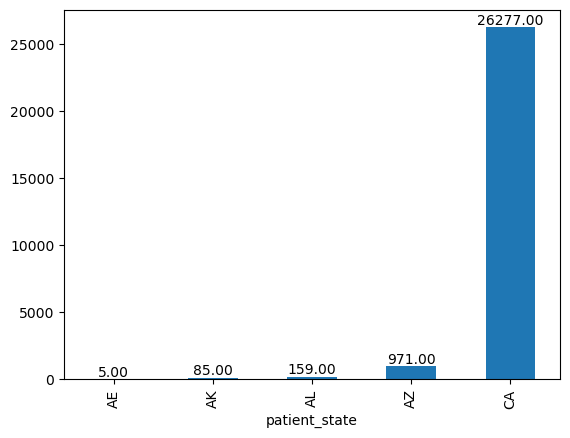

In [221]:
#plotting count of patients on state
#reference taken from tirua's code
pt_st_cn = df.groupby('patient_state')['journey_id'].nunique()


pt_st_cn .plot.bar()
for i, v in enumerate(pt_st_cn):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.show()

In [222]:
# Most of the patients are from California, all other values aare negligible

In [223]:
# On searching NDC codes on google from prescription data, I found that these codes 
# used below are corresponding to use of Ozempic
df2['ndc'] = df2['ndc'].astype(str)
presc_df_new  = df2[df2['ndc'].isin(['169413013','169418113','169477212','169413212'])]


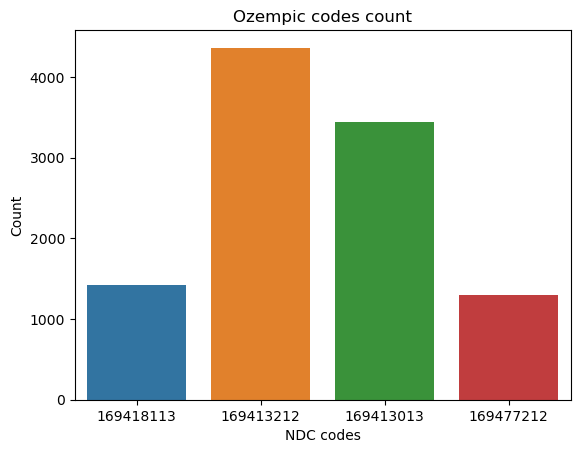

In [224]:
#plotting count of nifferent NDC codes prescribed
sns.countplot(x='ndc', data=presc_df_new)
plt.title('Ozempic codes count')
plt.xlabel('NDC codes')
plt.ylabel('Count')
plt.show()

In [225]:
# On searching different Diagnosis code on google, I found that codes starting with E66 are related to obesity

df_obesity = df[df['diag_1'].str.startswith("E66")|
      df['diag_2'].str.startswith("E66")|
      df['diag_3'].str.startswith("E66")|
      df['diag_4'].str.startswith("E66")|
      df['diag_5'].str.startswith("E66")]

In [226]:
df_obesity['diag'] = "Obesity"
df_obesity.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63026 entries, 22 to 623506
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   journey_id         63026 non-null  object 
 1   episode_id         63026 non-null  object 
 2   visit_id           62900 non-null  object 
 3   encounter_id       63026 non-null  object 
 4   claim_date         63026 non-null  object 
 5   patient_state      63026 non-null  object 
 6   patient_short_zip  63018 non-null  float64
 7   patient_age        62224 non-null  float64
 8   patient_gender     63023 non-null  object 
 9   place_of_service   50211 non-null  object 
 10  visit_type         59858 non-null  object 
 11  payor              60251 non-null  object 
 12  payor_channel      58314 non-null  object 
 13  ref_npi            24221 non-null  float64
 14  hcp_npi            49907 non-null  float64
 15  hcp_taxonomy       49357 non-null  object 
 16  hcp_specialty      49357 

C:\Users\yajur\AppData\Local\Temp\ipykernel_17928\1133912733.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_obesity['diag'] = "Obesity"


In [227]:
# # On searching different Diagnosis code on google, I found that codes starting with I10 are related to hypertension

In [228]:
df_hypertension = df[df['diag_1'].str.startswith("I10")|
      df['diag_2'].str.startswith("I10")|
      df['diag_3'].str.startswith("I10")|
      df['diag_4'].str.startswith("I10")|
      df['diag_5'].str.startswith("I10")]

In [229]:
df_hypertension['diag'] = "Hypertension"
df_hypertension.info()

<class 'pandas.core.frame.DataFrame'>
Index: 154197 entries, 6 to 623524
Data columns (total 35 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   journey_id         154197 non-null  object 
 1   episode_id         154197 non-null  object 
 2   visit_id           154005 non-null  object 
 3   encounter_id       154197 non-null  object 
 4   claim_date         154197 non-null  object 
 5   patient_state      154197 non-null  object 
 6   patient_short_zip  154197 non-null  float64
 7   patient_age        152871 non-null  float64
 8   patient_gender     154177 non-null  object 
 9   place_of_service   117084 non-null  object 
 10  visit_type         148911 non-null  object 
 11  payor              148431 non-null  object 
 12  payor_channel      142942 non-null  object 
 13  ref_npi            66804 non-null   float64
 14  hcp_npi            110959 non-null  float64
 15  hcp_taxonomy       109870 non-null  object 
 16  hcp_spe

C:\Users\yajur\AppData\Local\Temp\ipykernel_17928\1842887407.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hypertension['diag'] = "Hypertension"


In [230]:
#checking count of gender related to hypertension
pt_gender_cnt = df_hypertension.groupby(['diag', 'patient_gender'])['journey_id'].nunique().reset_index(name = 'count')
total_ct = pt_gender_cnt.groupby('diag')['count'].transform('sum')
pt_gender_cnt['gender_ratio'] = pt_gender_cnt['count']/total_ct
pt_gender_cnt

,diag,patient_gender,count,gender_ratio
0,Hypertension,F,10226,0.567386
1,Hypertension,M,7797,0.432614


Text(0.5, 1.0, 'Gender distribution of Hypertension patients')

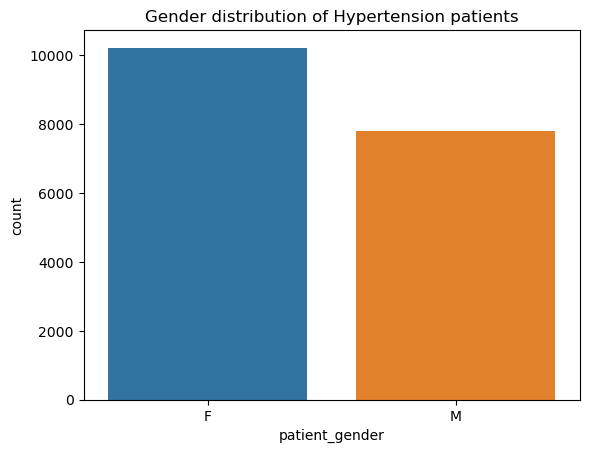

In [231]:
#plotting gender with hypertension
sns.barplot(pt_gender_cnt, x='patient_gender', y='count').set_title("Gender distribution of Hypertension patients")

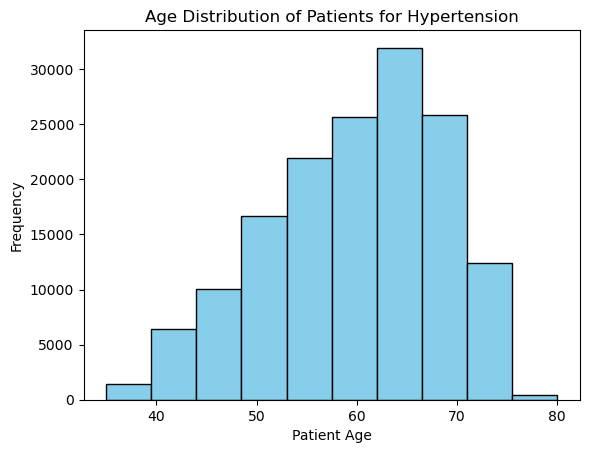

In [232]:
# Age distribution of patients for hypertension
plt.hist(df_hypertension['patient_age'], bins=10, color='skyblue', edgecolor='black')

plt.xlabel('Patient Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Patients for Hypertension')

plt.show()

In [234]:
#insights: On doing basic EDA in both the files, We can see observe few important metrics for our predictions, like age, gender,
# NDC Codes and how these different metrics are distributed acroess the data. 

# There are a lot of unnecessary columns which can be dropped as they would only make computation heavy,
#also we can remove columns with mostly NAs, also drop NAs from few columns.

## Preprocessing and Merge

In [235]:
#dropping unnecessary columns
df = df.drop(columns= ['hcp_specialty','payor_channel','ref_npi','hcp_npi','hcp_taxonomy','hcp_specialty','hco_npi',
                       'hcp_npi_list','hco_npi_list','visit_id','episode_id','encounter_id','place_of_service',
                      'visit_type','proc_modifier','line_charge','claim_charge','smart_allowed','payor',
                      'rev_center_code','rev_center_units','proc_units'])


In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623525 entries, 0 to 623524
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   journey_id         623525 non-null  object 
 1   claim_date         623525 non-null  object 
 2   patient_state      623525 non-null  object 
 3   patient_short_zip  623512 non-null  float64
 4   patient_age        616980 non-null  float64
 5   patient_gender     623393 non-null  object 
 6   diag_list          622655 non-null  object 
 7   diag_1             622655 non-null  object 
 8   diag_2             460595 non-null  object 
 9   diag_3             365284 non-null  object 
 10  diag_4             298233 non-null  object 
 11  diag_5             205016 non-null  object 
 12  proc_code          599612 non-null  object 
dtypes: float64(2), object(11)
memory usage: 61.8+ MB


In [237]:
# dropping duplicate values
df = df.drop_duplicates()

In [23]:
df.isna().sum()

journey_id                0
claim_date                0
patient_state             0
patient_short_zip        13
patient_age            2618
patient_gender          112
diag_list               810
diag_1                  810
diag_2               142986
diag_3               227085
diag_4               286018
diag_5               368719
proc_code              7576
dtype: int64

In [254]:
#dropping NAs from the selected columns, also removing rows with age below 40 as mentioned in question
df = df.dropna(subset= ['patient_age','proc_code','diag_list','patient_short_zip'])
df = df[df['patient_age'] >= 40]

In [255]:
# Creating new column Obesity, if the diag_list column contains the string 'E66' then 1 else 0

df['Obesity'] = df['diag_list'].str.contains('E66').astype(int)

In [256]:
df.Obesity.value_counts()

Obesity
0    454453
1     68340
Name: count, dtype: int64

In [257]:
# Creating new column Hypertension, if the diag_list column contains the string 'I10' then 1 else 0

df['Hypertension'] = df['diag_list'].str.contains('I10').astype(int)

In [258]:
df.Hypertension.value_counts()

Hypertension
0    373528
1    149265
Name: count, dtype: int64

In [259]:
# Now, only those rows matter to us who were either Obese or Hypertensed, so we can check the impact of Ozempic on them,
# whether given or not and how it affects, so filtering only those rows

In [260]:
df_filtered = df[(df['Obesity'] != 0) | (df['Hypertension'] != 0)]

In [261]:
df_filtered

,journey_id,claim_date,patient_state,patient_short_zip,patient_age,patient_gender,diag_list,diag_1,diag_2,diag_3,diag_4,diag_5,proc_code,Obesity,Hypertension
6,00006d564a4718c744f1bbf1b6c5f8c3,2022-09-16,CA,900.0,50.0,F,"R9431,E039,I10,Z6825",R9431,E039,I10,Z6825,NaN,1159F,0,1
10,00006d564a4718c744f1bbf1b6c5f8c3,2022-09-16,CA,900.0,50.0,F,"R9431,E039,I10,Z6825",R9431,E039,I10,Z6825,NaN,3008F,0,1
13,00006d564a4718c744f1bbf1b6c5f8c3,2022-09-16,CA,900.0,50.0,F,"R9431,E039,I10,Z6825",R9431,E039,I10,Z6825,NaN,1160F,0,1
16,00006d564a4718c744f1bbf1b6c5f8c3,2022-09-28,CA,900.0,50.0,F,"N200,I10,E039",N200,I10,E039,NaN,NaN,50432,0,1
17,00006d564a4718c744f1bbf1b6c5f8c3,2019-11-01,CA,900.0,50.0,F,"E7800,E039,I10,R809",E7800,E039,I10,R809,NaN,80053,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623506,1fff36b69093f3ece1c2426183acaf31,2020-02-18,CA,910.0,65.0,F,"E6601,I10,Z6839,I2510,J449",E6601,I10,Z6839,I2510,J449,99214,1,1
623509,1fff36b69093f3ece1c2426183acaf31,2020-04-29,CA,910.0,65.0,F,"I442,I10,J45909,K219,Z7982,Z79899",I442,I10,J45909,K219,Z7982,93005,0,1
623517,1fff36b69093f3ece1c2426183acaf31,2022-07-25,CA,910.0,70.0,F,"E1136,J849,E1169,I442,E785,Z6838,E039,E6601",E1136,J849,E1169,I442,E785,1160F,1,0
623519,1fffbb8b7e6a6c38cf97dafe3c5bc1cc,2022-07-01,CA,922.0,45.0,M,I10,I10,NaN,NaN,NaN,NaN,76775,0,1


In [262]:
#Taking necessary columns from Presc data
prescription_df_ = df2.loc[:,['journey_id','ndc','active']]

In [263]:
#Mearging both datasets on journey ID, also to ease the computation, I merged after filtering most data as kernel was crashing 
# if I mergend entire dataset

df_joined = pd.merge(df_filtered, prescription_df_ , on  = 'journey_id')

In [264]:
df_joined

,journey_id,claim_date,patient_state,patient_short_zip,patient_age,patient_gender,diag_list,diag_1,diag_2,diag_3,diag_4,diag_5,proc_code,Obesity,Hypertension,ndc,active
0,000072bc05e31d0126475c7a3e771af1,2023-02-03,CA,921.0,55.0,M,"Z86010,E669,E7800,F410,F411,I10,G4733,L578,M85...",Z86010,E669,E7800,F410,F411,99212,1,1,16714018301,True
1,000072bc05e31d0126475c7a3e771af1,2023-02-03,CA,921.0,55.0,M,"Z86010,E669,E7800,F410,F411,I10,G4733,L578,M85...",Z86010,E669,E7800,F410,F411,99212,1,1,60219175203,True
2,000072bc05e31d0126475c7a3e771af1,2023-02-03,CA,921.0,55.0,M,"Z86010,E669,E7800,F410,F411,I10,G4733,L578,M85...",Z86010,E669,E7800,F410,F411,99212,1,1,60219175203,True
3,000072bc05e31d0126475c7a3e771af1,2023-02-03,CA,921.0,55.0,M,"Z86010,E669,E7800,F410,F411,I10,G4733,L578,M85...",Z86010,E669,E7800,F410,F411,99212,1,1,60219175203,True
4,000072bc05e31d0126475c7a3e771af1,2023-02-03,CA,921.0,55.0,M,"Z86010,E669,E7800,F410,F411,I10,G4733,L578,M85...",Z86010,E669,E7800,F410,F411,99212,1,1,13107015630,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7603053,1ffdeeeb07ed99dca9658298d836e301,2023-03-20,CA,922.0,65.0,M,"I10,E6609,E7800,R9431,Z6832",I10,E6609,E7800,R9431,Z6832,99213,1,1,51660093901,True
7603054,1ffdeeeb07ed99dca9658298d836e301,2023-03-20,CA,922.0,65.0,M,"I10,E6609,E7800,R9431,Z6832",I10,E6609,E7800,R9431,Z6832,99213,1,1,93310953,True
7603055,1ffdeeeb07ed99dca9658298d836e301,2023-03-20,CA,922.0,65.0,M,"I10,E6609,E7800,R9431,Z6832",I10,E6609,E7800,R9431,Z6832,99213,1,1,68462027601,True
7603056,1ffdeeeb07ed99dca9658298d836e301,2023-03-20,CA,922.0,65.0,M,"I10,E6609,E7800,R9431,Z6832",I10,E6609,E7800,R9431,Z6832,99213,1,1,68462027601,True


In [265]:
# Now after googling, I knew below mentioned NDC codes are for Ozempic, so if prescribed, marking it 1 else 0

df_joined['ozempic'] = np.where(df_joined['ndc'].isin(['169413013','169418113','169477212','169413212']),1,0 )

In [266]:
#removing unnecessary columns and grouping data
df_joined = df_joined.groupby(['journey_id', 'patient_state', 'patient_short_zip', 'patient_age', 'patient_gender','ndc','active']).agg(
    hypertension=('Hypertension', 'min'),
    Obesity=('Obesity', 'min'),
    first_diag_date=('claim_date', 'min'),
    last_diag_date=('claim_date', 'max'),
    ozempic = ('ozempic','min')).reset_index()

In [267]:
df_joined

,journey_id,patient_state,patient_short_zip,patient_age,patient_gender,ndc,active,hypertension,Obesity,first_diag_date,last_diag_date,ozempic
0,000072bc05e31d0126475c7a3e771af1,CA,921.0,55.0,M,13107015630,True,1,1,2023-02-03,2023-02-03,0
1,000072bc05e31d0126475c7a3e771af1,CA,921.0,55.0,M,16714007701,True,1,1,2023-02-03,2023-02-03,0
2,000072bc05e31d0126475c7a3e771af1,CA,921.0,55.0,M,16714018301,True,1,1,2023-02-03,2023-02-03,0
3,000072bc05e31d0126475c7a3e771af1,CA,921.0,55.0,M,16714018302,True,1,1,2023-02-03,2023-02-03,0
4,000072bc05e31d0126475c7a3e771af1,CA,921.0,55.0,M,31722070090,True,1,1,2023-02-03,2023-02-03,0
...,...,...,...,...,...,...,...,...,...,...,...,...
222418,1ffdeeeb07ed99dca9658298d836e301,CA,922.0,65.0,M,51660093901,True,1,0,2023-01-04,2023-07-11,0
222419,1ffdeeeb07ed99dca9658298d836e301,CA,922.0,65.0,M,65162046650,True,1,0,2023-01-04,2023-07-11,0
222420,1ffdeeeb07ed99dca9658298d836e301,CA,922.0,65.0,M,68462027601,True,1,0,2023-01-04,2023-07-11,0
222421,1ffdeeeb07ed99dca9658298d836e301,CA,922.0,65.0,M,70436015542,True,1,0,2023-01-04,2023-07-11,0


##  Causal Analysis Setup

## Endogeneity Issues

When finding the treatment effect of Ozempic on patients, we have to deal with endogeneity issues. Endogeneity can be due to  many, like omitted variable bias, measurement error, etc. It can lead to biased and inconsistent estimates of the treatment effect.

- Omitted Variable Bias: Unobserved factors that influence outcomes. Like we dropped a lot of columns which could have an impact

- Measurement Error: wrongly measured treatment variable or outcome variables

- Selection Bias: If patients are not randomly selected for treatment.

## Strategies to address endogeneity:

- RDD: We can compare patients just above and below treatment cutoff. As they're similar in most ways except for receiving the treatment.

- Instrumental Variables: It helps us isolate the impact of Ozempic from other influencing factors.



##  Double-Lasso

In [288]:
#Making dummy variables and encoding data
new_dummies = pd.get_dummies(df_joined[['patient_gender']])

list_column = ['patient_state', 'patient_short_zip', 'patient_age', 'ndc']
for column in list_column:
    df_joined[column] = pd.Categorical(df_joined[column]).codes

all_Data = df_joined.join(new_dummies)

In [289]:
all_Data['patient_gender_M']= all_Data['patient_gender_M'].astype(int)
all_Data['active']=all_Data['active'].astype(int)

In [290]:
all_Data

,journey_id,patient_state,patient_short_zip,patient_age,patient_gender,ndc,active,hypertension,Obesity,first_diag_date,last_diag_date,ozempic,patient_gender_F,patient_gender_M
0,000072bc05e31d0126475c7a3e771af1,3,22,3,M,590,1,1,1,2023-02-03,2023-02-03,0,False,1
1,000072bc05e31d0126475c7a3e771af1,3,22,3,M,1017,1,1,1,2023-02-03,2023-02-03,0,False,1
2,000072bc05e31d0126475c7a3e771af1,3,22,3,M,1083,1,1,1,2023-02-03,2023-02-03,0,False,1
3,000072bc05e31d0126475c7a3e771af1,3,22,3,M,1084,1,1,1,2023-02-03,2023-02-03,0,False,1
4,000072bc05e31d0126475c7a3e771af1,3,22,3,M,3070,1,1,1,2023-02-03,2023-02-03,0,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222418,1ffdeeeb07ed99dca9658298d836e301,3,23,5,M,5796,1,1,0,2023-01-04,2023-07-11,0,False,1
222419,1ffdeeeb07ed99dca9658298d836e301,3,23,5,M,9488,1,1,0,2023-01-04,2023-07-11,0,False,1
222420,1ffdeeeb07ed99dca9658298d836e301,3,23,5,M,11134,1,1,0,2023-01-04,2023-07-11,0,False,1
222421,1ffdeeeb07ed99dca9658298d836e301,3,23,5,M,12305,1,1,0,2023-01-04,2023-07-11,0,False,1


In [291]:
# Creating Y variable where we assign 1 to those who are repeated patients indicating not treated, else 0 means treated

all_Data['y_var'] = all_Data.apply(lambda row: 1 if row['last_diag_date'] > row['first_diag_date'] else 0, axis=1)


In [297]:
# Now dropping columns which are not required for Lasso
#Spltting dataset in test and train
xx = all_Data.drop(columns = ['ozempic','y_var','ndc','Obesity','hypertension','journey_id','first_diag_date','last_diag_date','patient_gender_F','patient_gender'])
yy = all_Data['y_var']
treatment_effect = all_Data['ozempic']
x_train,x_test, y_train,y_test,treatment_effect_train,treatment_effect_test = model_selection.train_test_split(xx,yy,treatment_effect,test_size= 0.2)

In [298]:
x_train

,patient_state,patient_short_zip,patient_age,active,patient_gender_M
109675,3,23,2,1,1
111012,3,16,3,1,0
183437,3,16,4,1,1
179124,3,23,4,1,1
85379,3,16,3,1,0
...,...,...,...,...,...
76001,3,16,2,1,1
60956,3,18,5,1,1
48330,3,17,5,1,0
104000,3,16,4,1,0


In [299]:
from sklearn.linear_model import LogisticRegression,LinearRegression,LassoCV,Lasso
import numpy as np
from scipy.optimize import minimize
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import log_loss

In [300]:
# Lasso Model
lasso_new = Lasso()
lasso_new.fit(x_train,treatment_effect_train)

Lasso()

In [301]:
#Cross validation
lasso_cv = LassoCV(cv=10).fit(x_train, treatment_effect_train)

In [302]:
x_train

,patient_state,patient_short_zip,patient_age,active,patient_gender_M
109675,3,23,2,1,1
111012,3,16,3,1,0
183437,3,16,4,1,1
179124,3,23,4,1,1
85379,3,16,3,1,0
...,...,...,...,...,...
76001,3,16,2,1,1
60956,3,18,5,1,1
48330,3,17,5,1,0
104000,3,16,4,1,0


In [303]:
lasso_cv.alpha_

3.014334200144078e-06

In [304]:
#Creating new column 'Predicted'
x_train['predicted'] = lasso_new.predict(x_train)
x_train = pd.concat([x_train, treatment_effect_train], axis=1)
x_test['predicted'] = lasso_new.predict(x_test)
x_test = pd.concat([x_test, treatment_effect_test], axis=1)

In [305]:
lasso_cv.coef_

array([-0.00265936,  0.00029791, -0.00090444,  0.00714047, -0.00156053])

In [306]:
#Refernce from jake'scode
class SelectiveRegularizationLogisticRegression(BaseEstimator, ClassifierMixin):
    def __init__(self, penalty_indices, penalty_weights, tol=1e-4, max_iter=100):
        self.penalty_indices = penalty_indices
        self.penalty_weights = penalty_weights
        self.tol = tol
        self.max_iter = max_iter
    
    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def _loss(self, coef, X, y):
        predictions = self._sigmoid(X @ coef)
        # Basic log loss
        basic_loss = log_loss(y, predictions)
        
        # Regularization term, selectively applied with L1 penalty
        reg_term = sum(self.penalty_weights[i] * abs(coef[self.penalty_indices[i]]) for i in range(len(self.penalty_indices)))
        
        return basic_loss + reg_term
    
    def fit(self, X, y):
        # Add intercept term
        X = np.hstack([np.ones((X.shape[0], 1)), X])
        
        initial_coef = np.zeros(X.shape[1])
        result = minimize(self._loss, initial_coef, args=(X, y), method='SLSQP', tol=self.tol, options={'maxiter': self.max_iter})
        
        self.coef_ = result.x
        return self
    
    def predict_proba(self, X):
        X = np.hstack([np.ones((X.shape[0], 1)), X])
        proba = self._sigmoid(X @ self.coef_)
        return np.vstack([1-proba, proba]).T
    
    def predict(self, X):
        return (self.predict_proba(X)[:, 1] > 0.5).astype(int)

In [307]:
x_train

,patient_state,patient_short_zip,patient_age,active,patient_gender_M,predicted,ozempic
109675,3,23,2,1,1,0.006924,0
111012,3,16,3,1,0,0.006924,0
183437,3,16,4,1,1,0.006924,0
179124,3,23,4,1,1,0.006924,0
85379,3,16,3,1,0,0.006924,0
...,...,...,...,...,...,...,...
76001,3,16,2,1,1,0.006924,0
60956,3,18,5,1,1,0.006924,0
48330,3,17,5,1,0,0.006924,0
104000,3,16,4,1,0,0.006924,0


In [308]:
y_train

109675    1
111012    1
183437    1
179124    1
85379     1
         ..
76001     0
60956     0
48330     0
104000    0
115511    1
Name: y_var, Length: 177938, dtype: int64

In [309]:
#Refernce from jake's code
penalty_indices = [0,1,2,3,4,5]  # Apply penalties to the 2nd and 4th coefficients
penalty_weights = [lasso_cv.alpha_,lasso_cv.alpha_,lasso_cv.alpha_,lasso_cv.alpha_,lasso_cv.alpha_,lasso_cv.alpha_]  # Penalty weights for these coefficients

model = SelectiveRegularizationLogisticRegression(penalty_indices=penalty_indices, penalty_weights=penalty_weights)
model.fit(x_train, y_train.values)

SelectiveRegularizationLogisticRegression(penalty_indices=[0, 1, 2, 3, 4, 5],
                                          penalty_weights=[3.014334200144078e-06,
                                                           3.014334200144078e-06,
                                                           3.014334200144078e-06,
                                                           3.014334200144078e-06,
                                                           3.014334200144078e-06,
                                                           3.014334200144078e-06])

Justify the inclusion of variables in your model, explaining the rationale behind each decision.

-  I used Patient's location to see if patients from different states react differently to the drug, their food consumption, 
-  water consumption, demagraphics of the location, weather etc. make a difference or not.
-  Similarly how age and gender react differently to the drug
-  taking active variable to show that most patients continue to use ozempic and remain active

##  Model Evaluation

In [315]:
# Model evaluation - RMSE and R-sq
predict_lasso_test = model.predict(x_test.values)
r_sq_test = r2_score(y_test, predict_lasso_test)
rmse_lasso_test = np.sqrt(mean_squared_error(y_test, predict_lasso_test))

In [316]:
print("RMSE post partial lasso : {}".format(rmse_lasso_test))
print("R^2 post partial lasso : {}".format(r_sq_test))

RMSE post partial lasso : 0.6145001468528588
R^2 post partial lasso : -0.6067107306678221


The R-square comes out to be negative -0.6 which is extremely poor for this model, suggesting it is worse than thr NULL model
There might be a chance of underfitting as we have narrowed down the dataset quite a lot.
The RMSE alone does not provide enough information to evaluate the model.

## Additional Insights

Exploring some other variables, like Visit_type and its distribution alon zip code

In [319]:
#reading data
df_new = pd.read_csv("longyear-obese-hypertensive-40-57-medical-SMALL-sample.csv")

In [321]:
df_new.columns

Index(['journey_id', 'episode_id', 'visit_id', 'encounter_id', 'claim_date',
       'patient_state', 'patient_short_zip', 'patient_age', 'patient_gender',
       'place_of_service', 'visit_type', 'payor', 'payor_channel', 'ref_npi',
       'hcp_npi', 'hcp_taxonomy', 'hcp_specialty', 'hco_npi', 'hcp_npi_list',
       'hco_npi_list', 'diag_list', 'diag_1', 'diag_2', 'diag_3', 'diag_4',
       'diag_5', 'rev_center_code', 'rev_center_units', 'proc_code',
       'proc_modifier', 'proc_units', 'line_charge', 'claim_charge',
       'smart_allowed'],
      dtype='object')

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'home visit'),
  Text(1, 0, 'outpatient visit'),
  Text(2, 0, 'laboratory visit'),
  Text(3, 0, 'emergency room visit'),
  Text(4, 0, 'inpatient visit'),
  Text(5, 0, 'ambulance visit'),
  Text(6, 0, 'non-hospital institution visit'),
  Text(7, 0, 'pharmacy visit')])

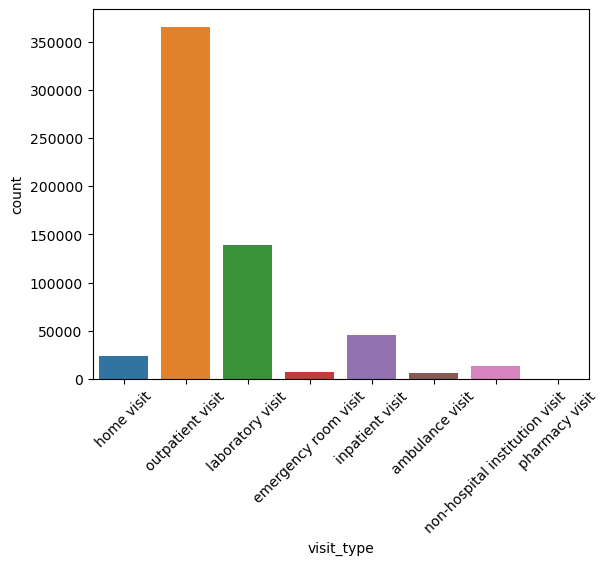

In [332]:
my_plot= sns.countplot(df_new, x = 'visit_type')
plt.xticks(rotation = 45)

In [333]:
# We can observe that the most common visit type is outpatient_visit, meaning patient is not staying overnight.

In [337]:
check= df_new[df_new['visit_type'] == 'outpatient visit']

Text(0.5, 1.0, 'outpatient distribution with zipcode ')

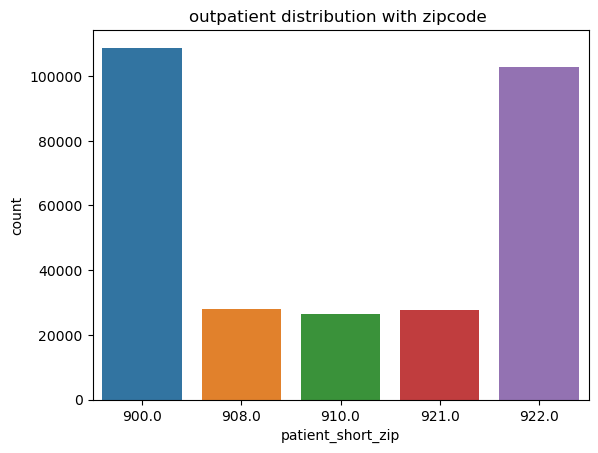

In [345]:
top=check.value_counts('patient_short_zip').reset_index()
top_5= top[:5]

sns.barplot(top_5, x = 'patient_short_zip', y= 'count').set_title('outpatient distribution with zipcode ')

we found most outpatients came from the following area:

- (900) - LA
- (922) - Indio
- (908) - Long Beach
- (921) - San Diego
- (910) - Pasadena